### Data Dictionary


    "Civic Duty" (variable civicduty) group members were sent a letter that simply said "DO YOUR CIVIC DUTY - VOTE!"
    "Hawthorne Effect" (variable hawthorne) group members were sent a letter that had the "Civic Duty" message plus the additional message "YOU ARE BEING STUDIED" and they were informed that their voting behavior would be examined by means of public records.
    "Self" (variable self) group members received the "Civic Duty" message as well as the recent voting record of everyone in that household and a message stating that another message would be sent after the election with updated records.
    "Neighbors" (variable neighbors) group members were given the same message as that for the "Self" group, except the message not only had the household voting records but also that of neighbors - maximizing social pressure.
    "Control" (variable control) group members were not sent anything, and represented the typical voting situation.

    Additional variables include sex (0 for male, 1 for female), 
    yob (year of birth), 
    and the dependent variable voting (1 if they voted, 0 otherwise).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.


### Data Exploration

In [2]:
df = pd.read_csv("gerber.csv")

In [3]:
df

,sex,yob,voting,hawthorne,civicduty,neighbors,self,control
0,0,1941,0,0,1,0,0,0
1,1,1947,0,0,1,0,0,0
2,1,1982,1,1,0,0,0,0
3,1,1950,1,1,0,0,0,0
4,0,1951,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
344079,1,1944,1,0,0,0,0,1
344080,1,1958,0,0,0,0,0,1
344081,0,1955,0,0,0,0,0,1
344082,1,1949,1,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344084 entries, 0 to 344083
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   sex        344084 non-null  int64
 1   yob        344084 non-null  int64
 2   voting     344084 non-null  int64
 3   hawthorne  344084 non-null  int64
 4   civicduty  344084 non-null  int64
 5   neighbors  344084 non-null  int64
 6   self       344084 non-null  int64
 7   control    344084 non-null  int64
dtypes: int64(8)
memory usage: 21.0 MB


In [5]:
df.describe(include='all')

,sex,yob,voting,hawthorne,civicduty,neighbors,self,control
count,344084.000000,344084.000000,344084.000000,344084.000000,344084.000000,344084.000000,344084.000000,344084.000000
mean,0.499282,1956.213654,0.315900,0.111031,0.111072,0.111022,0.111072,0.555803
std,0.500000,14.449093,0.464874,0.314171,0.314221,0.314160,0.314221,0.496877
min,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1956.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1965.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1986.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(344084, 8)

In [7]:
df.columns

Index(['sex', 'yob', 'voting', 'hawthorne', 'civicduty', 'neighbors', 'self',
       'control'],
      dtype='object')

### Data Visualization

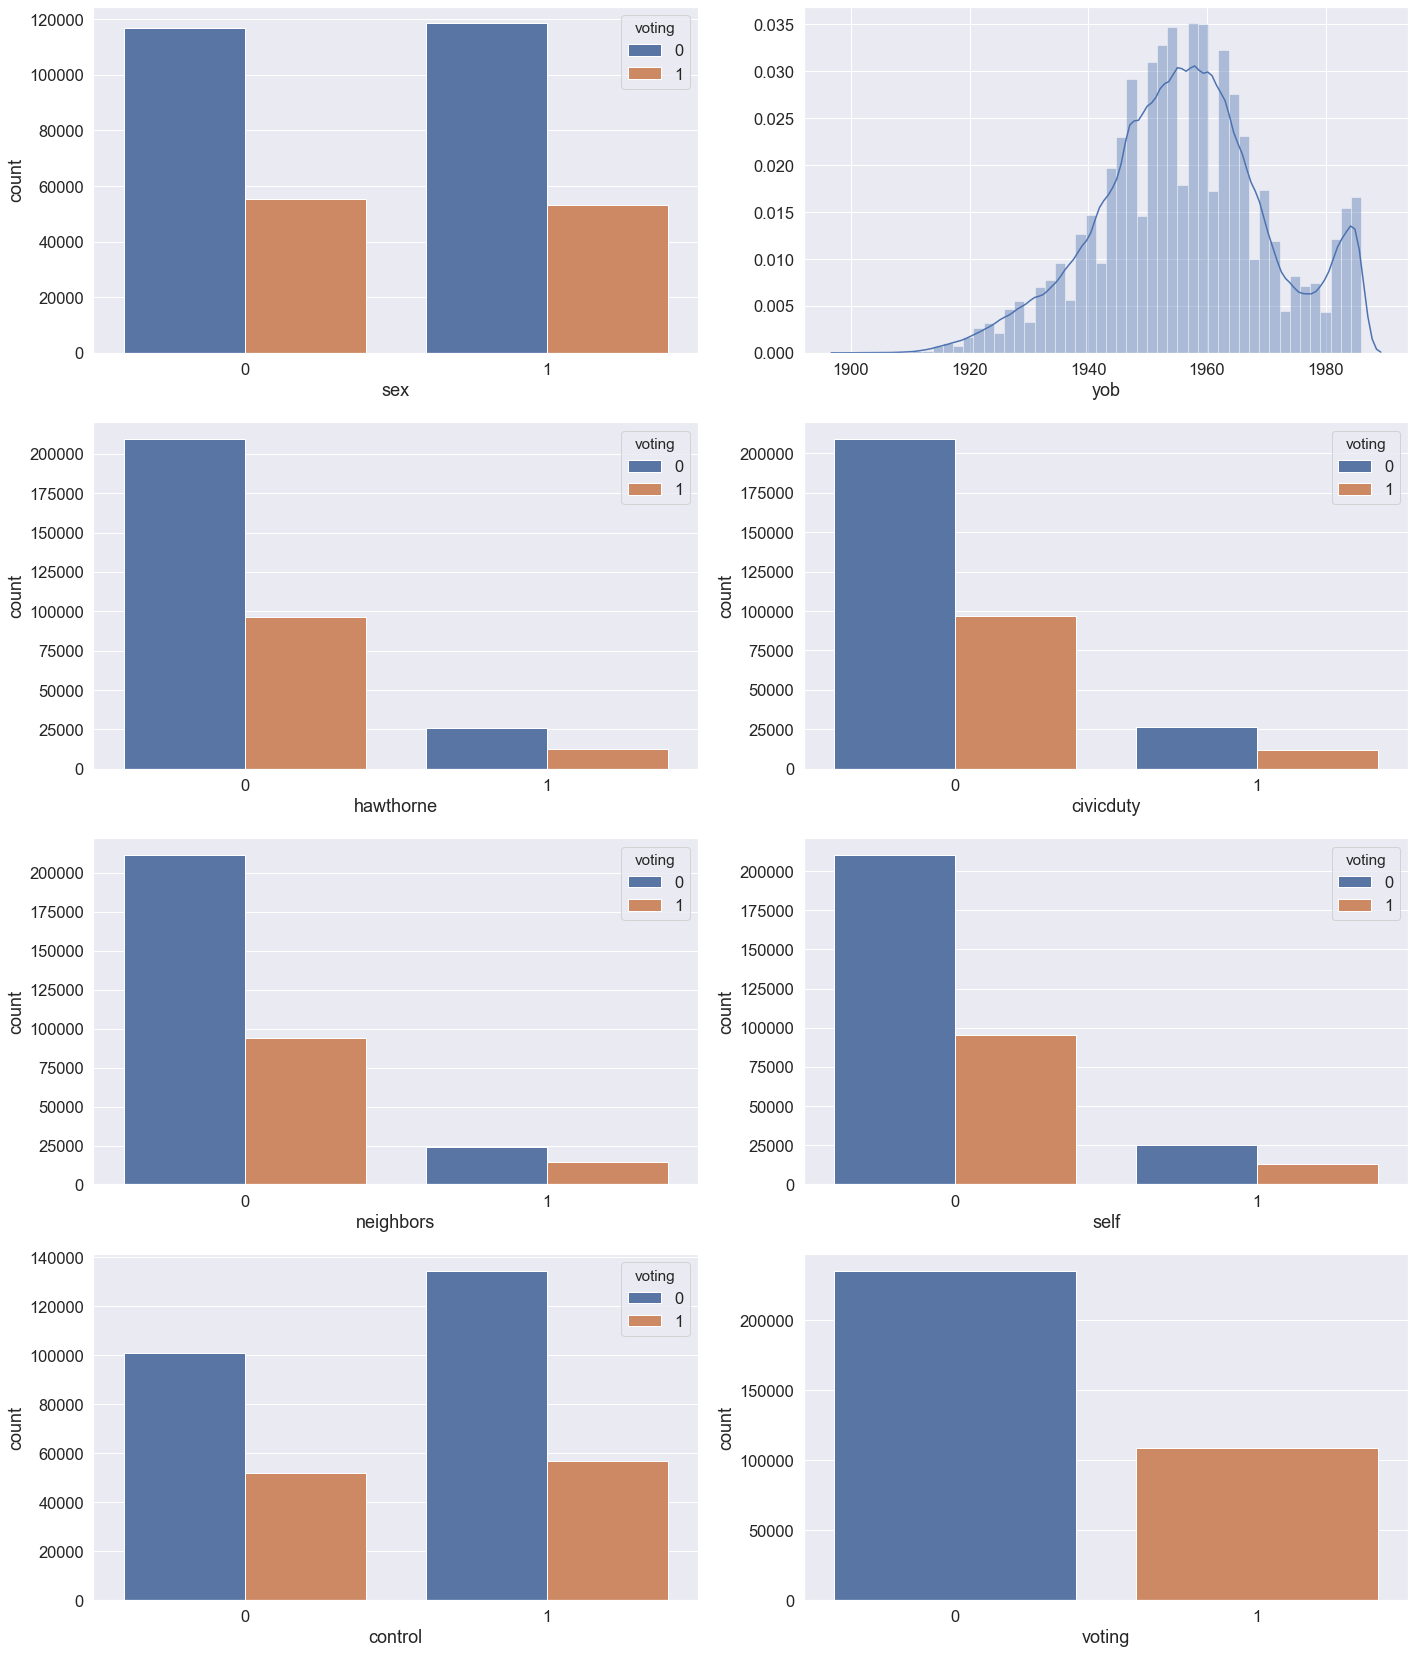

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(df.sex, hue=df.voting)
plt.subplot(7,2,2)
sns.distplot(df.yob)
plt.subplot(7,2,3)
sns.countplot(df.hawthorne, hue=df.voting)
plt.subplot(7,2,4)
sns.countplot(df.civicduty, hue=df.voting)
plt.subplot(7,2,5)
sns.countplot(df.neighbors, hue=df.voting)
plt.subplot(7,2,6)
sns.countplot(df.self, hue=df.voting)
plt.subplot(7,2,7)
sns.countplot(df.control, hue=df.voting)
plt.subplot(7,2,8)
sns.countplot(df.voting)
# plt.subplot(7,2,9)
# sns.countplot()
# plt.subplot(7,2,10)
# sns.countplot()
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

In [9]:
df.corr()

,sex,yob,voting,hawthorne,civicduty,neighbors,self,control
sex,1.000000,0.032534,-0.012903,-0.000196,0.000637,0.000554,0.000212,-0.000763
yob,0.032534,1.000000,-0.131184,0.001995,0.003115,-0.001629,-0.000151,-0.002106
voting,-0.012903,-0.131184,1.000000,0.004922,-0.001036,0.047169,0.022243,-0.046347
hawthorne,-0.000196,0.001995,0.004922,1.000000,-0.124924,-0.124893,-0.124924,-0.395323
civicduty,0.000637,0.003115,-0.001036,-0.124924,1.000000,-0.124919,-0.124950,-0.395404
neighbors,0.000554,-0.001629,0.047169,-0.124893,-0.124919,1.000000,-0.124919,-0.395305
self,0.000212,-0.000151,0.022243,-0.124924,-0.124950,-0.124919,1.000000,-0.395404
control,-0.000763,-0.002106,-0.046347,-0.395323,-0.395404,-0.395305,-0.395404,1.000000


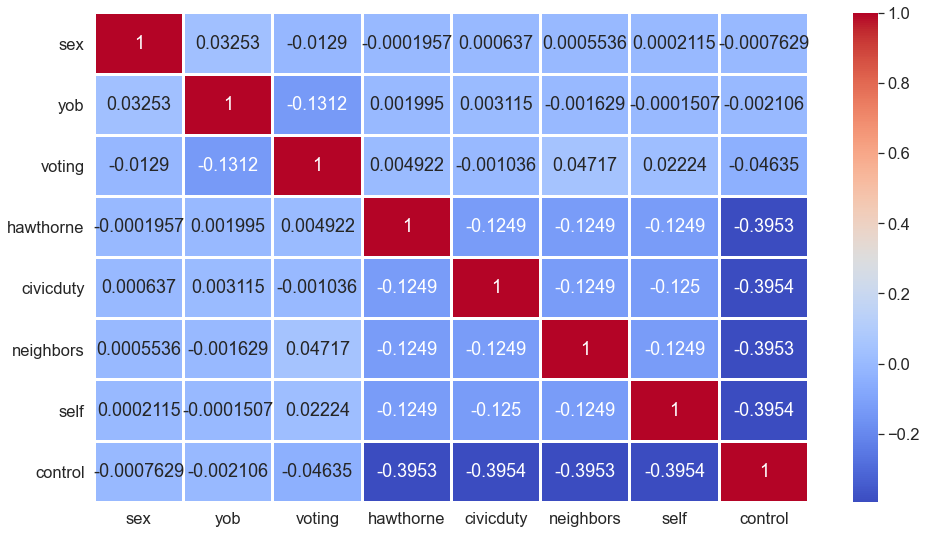

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.4g',linewidths=2)
plt.show()

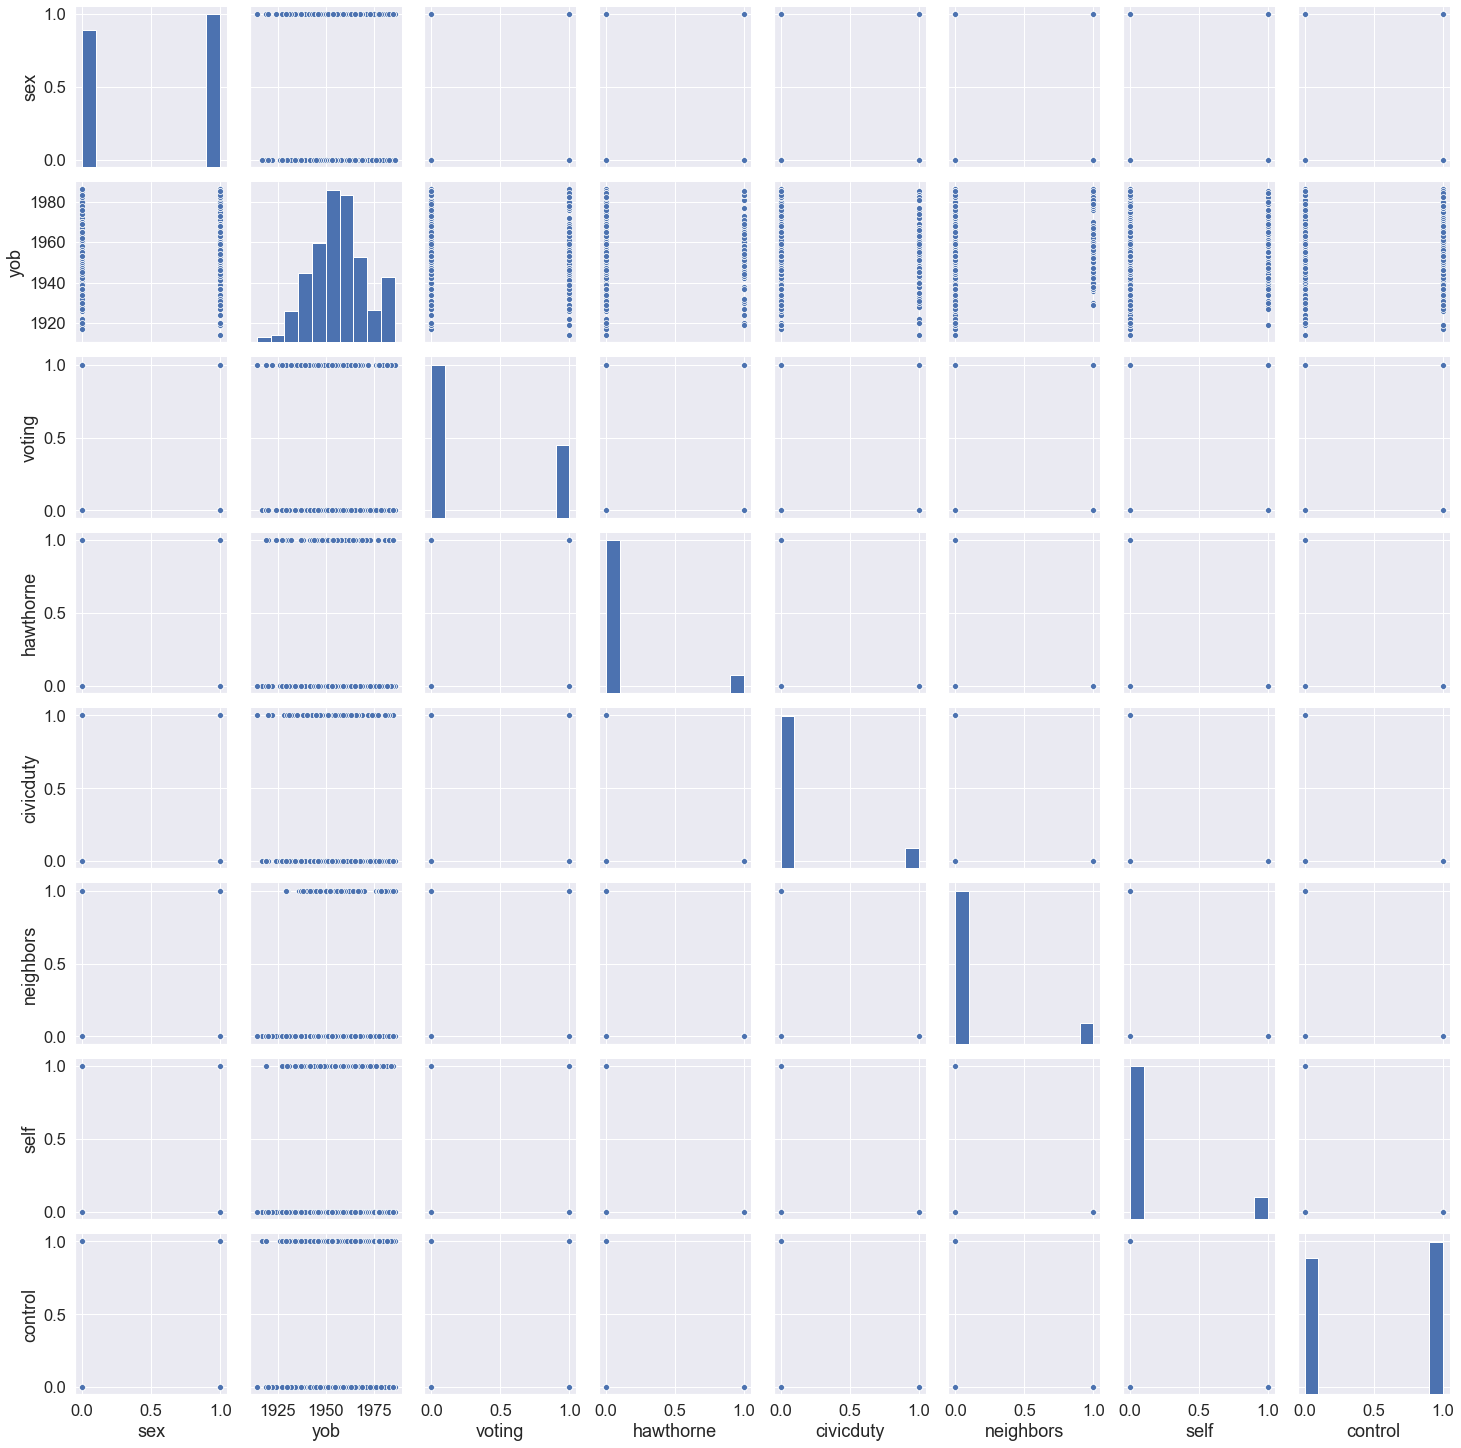

In [11]:
sns.pairplot(df.sample(1000))
plt.show()

### Data Preprocessing

### Treat Missing Values

In [12]:
df.isnull().sum()

sex          0
yob          0
voting       0
hawthorne    0
civicduty    0
neighbors    0
self         0
control      0
dtype: int64

### Treat Duplicate Values

In [13]:
df.duplicated(keep='first').sum()

342517

In [14]:
df[df.duplicated(keep=False)]

,sex,yob,voting,hawthorne,civicduty,neighbors,self,control
0,0,1941,0,0,1,0,0,0
1,1,1947,0,0,1,0,0,0
2,1,1982,1,1,0,0,0,0
3,1,1950,1,1,0,0,0,0
4,0,1951,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
344079,1,1944,1,0,0,0,0,1
344080,1,1958,0,0,0,0,0,1
344081,0,1955,0,0,0,0,0,1
344082,1,1949,1,0,0,0,0,1


#### All unique based on YOB

### Treat Imbalance Data

### Treat Outliers

### Treat Data Types

### Feature Scaling

In [15]:
df.columns

Index(['sex', 'yob', 'voting', 'hawthorne', 'civicduty', 'neighbors', 'self',
       'control'],
      dtype='object')

In [16]:
df.drop(['yob'],axis=1, inplace=True)

In [17]:
df

,sex,voting,hawthorne,civicduty,neighbors,self,control
0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0
2,1,1,1,0,0,0,0
3,1,1,1,0,0,0,0
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
344079,1,1,0,0,0,0,1
344080,1,0,0,0,0,0,1
344081,0,0,0,0,0,0,1
344082,1,1,0,0,0,0,1


In [18]:
df = df[['sex', 'hawthorne', 'civicduty', 'neighbors', 'self', 'control', 'voting' ]]

In [19]:
df

,sex,hawthorne,civicduty,neighbors,self,control,voting
0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0
2,1,1,0,0,0,0,1
3,1,1,0,0,0,0,1
4,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
344079,1,0,0,0,0,1,1
344080,1,0,0,0,0,1,0
344081,0,0,0,0,0,1,0
344082,1,0,0,0,0,1,1


### Create and save processed dataset

In [20]:
#df.to_csv("votingtrain.csv",index=False)

### Model Training

In [21]:
X = df.iloc[:,0:6]
y = df.iloc[:,6]

In [22]:
X.values, y.values

(array([[0, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1]], dtype=int64),
 array([0, 0, 1, ..., 0, 1, 1], dtype=int64))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240858, 6), (103226, 6), (240858,), (103226,))

### Using TPOT

In [26]:
# tpot = TPOTClassifier(generations=3,population_size=10,scoring='accuracy', cv=5, verbosity=2, random_state=0, early_stop=1)

In [27]:
# tpot.fit(X_train,y_train)

In [28]:
# tpot.score(X_test, y_test)

### Using XGBoost

In [29]:
xgb = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [30]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=30)

[0]	validation_0-error:0.317003
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.317003
[2]	validation_0-error:0.317003
[3]	validation_0-error:0.317003
[4]	validation_0-error:0.317003
[5]	validation_0-error:0.317003
[6]	validation_0-error:0.317003
[7]	validation_0-error:0.317003
[8]	validation_0-error:0.317003
[9]	validation_0-error:0.317003
[10]	validation_0-error:0.317003
[11]	validation_0-error:0.317003
[12]	validation_0-error:0.317003
[13]	validation_0-error:0.317003
[14]	validation_0-error:0.317003
[15]	validation_0-error:0.317003
[16]	validation_0-error:0.317003
[17]	validation_0-error:0.317003
[18]	validation_0-error:0.317003
[19]	validation_0-error:0.317003
[20]	validation_0-error:0.317003
[21]	validation_0-error:0.317003
[22]	validation_0-error:0.317003
[23]	validation_0-error:0.317003
[24]	validation_0-error:0.317003
[25]	validation_0-error:0.317003
[26]	validation_0-error:0.317003
[27]	validation_0-error:0.317003
[28]	validation_0-er

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
y_pred = xgb.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation

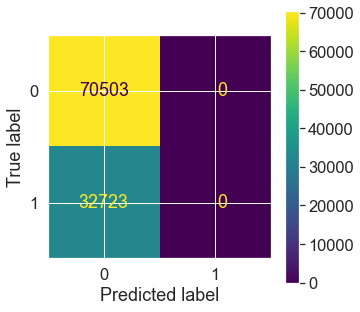

In [33]:
fig , ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(xgb,X_test,y_test,values_format='4g',ax=ax)
plt.show()

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81     70503
           1       0.00      0.00      0.00     32723

    accuracy                           0.68    103226
   macro avg       0.34      0.50      0.41    103226
weighted avg       0.47      0.68      0.55    103226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


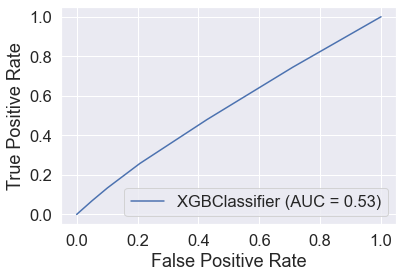

In [35]:
plot_roc_curve(xgb,X_test,y_test)
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

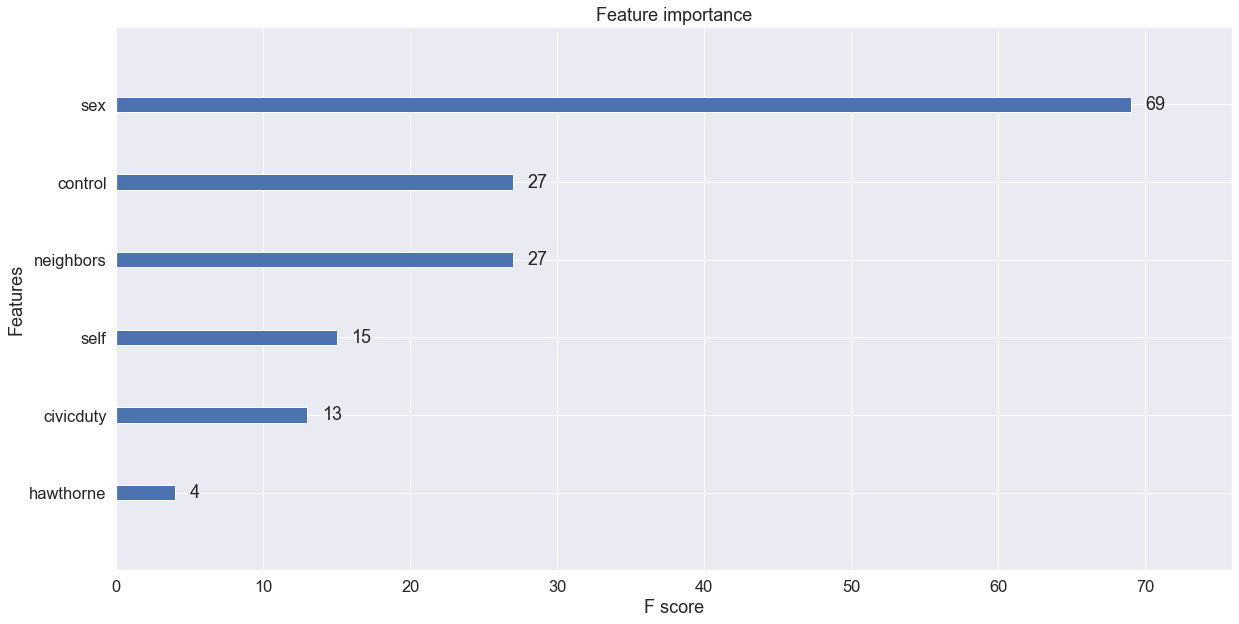

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
plot_importance(xgb,ax=ax)
plt.show()

Example:

f = 'gain'

XGBClassifier.get_booster().get_score(importance_type= f)

### Cross-Validation

In [37]:
cv = cross_val_score(xgb,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.1s finished


In [38]:
cv.mean()

0.6841003940875888